In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [2]:
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [3]:
# print the names of the four features
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print integers representing the species of each observation
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print iris.target_names

['setosa' 'versicolor' 'virginica']


# Requirements for working with data in scikit-learn
- Features and response are separate objects
- Features and response should be numeric
- Features and response should be NumPy arrays
- Features and response should have specific shapes

In [7]:
# check the types of the features and response
print type(iris.data)
print type(iris.target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [8]:
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print iris.data.shape

(150L, 4L)


In [9]:
# check the shape of the response (single dimension matching the number of observations)
print iris.target.shape

(150L,)


In [10]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

# K-nearest neighbors (KNN) classification
- Pick a value for K.
- Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
- Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

# scikit-learn 4-step modeling pattern¶

## Step 1: Import the class you plan to use



In [11]:
from sklearn.neighbors import KNeighborsClassifier

## Step 2: "Instantiate" the "estimator"
- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [13]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')



## Step 3: Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [14]:
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


#3 Step 4: Predict the response for a new observation
- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [15]:
knn.predict([3, 5, 4, 2])

C:\Users\seeth_000\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

- Returns a NumPy array
- Can predict for multiple observations at once

In [16]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Using a different value for K¶

In [17]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

## Using a different classification model

In [19]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

# Evaluation procedure #1: Train and test on the entire dataset
- Train the model on the entire dataset.
- Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [20]:
# store the predicted response values
y_pred = logreg.predict(X)

### Classification accuracy:
- Proportion of correct predictions
- Common evaluation metric for classification problems

In [21]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.96


Known as training accuracy when you train and test the model on the same data

### KNN (K=5)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.966666666667


In [23]:
### KNN(K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


# Problems with training and testing on the same data
- Goal is to estimate likely performance of a model on out-of-sample data
- But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
- Unnecessarily complex models overfit the training data

# Evaluation procedure #2: Train/test split
- Split the dataset into two pieces: a training set and a testing set.
- Train the model on the training set.
- Test the model on the testing set, and evaluate how well we did.

In [24]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [25]:
# print the shapes of the new X objects
print X_train.shape
print X_test.shape

(90L, 4L)
(60L, 4L)


In [26]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [29]:
# KNN=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


In [30]:
# KNN=5
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


Can we locate an even better value for K?

In [31]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

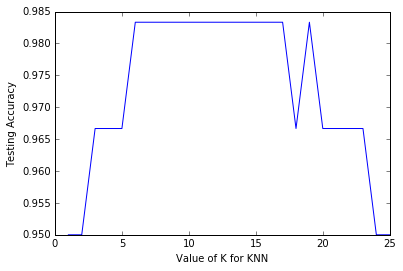

In [32]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the value of K (lower value = more complex)

# Downsides of train/test split?
- Provides a high-variance estimate of out-of-sample accuracy
- K-fold cross-validation overcomes this limitation
- But, train/test split is still useful because of its flexibility and speed

# Steps for K-fold cross-validation
1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

In [34]:

# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains 25 observations (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for 5 iterations
- For each iteration, every observation is either in the training set or the testing set, but not both
- Every observation is in the testing set exactly once

### Comparing cross-validation to train/test split
#### Advantages of cross-validation:
- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

#### Advantages of train/test split:
- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Cross-validation recommendations
- K can be any number, but K=10 is generally recommended
- For classification problems, stratified sampling is recommended for creating the folds
- - Each response class should be represented with equal proportions in each of the K folds
- - scikit-learn's cross_val_score function does this by default

## Cross-validation example: parameter tuning
- Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [36]:
from sklearn.cross_validation import cross_val_score

In [37]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [38]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [39]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') #running cross-val on each k
    k_scores.append(scores.mean()) #appending cross val score(score mean)
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


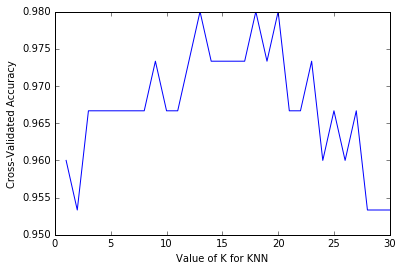

In [40]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Cross-validation example: model selection
- Goal: Compare the best KNN model with logistic regression on the iris dataset

In [42]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [44]:
# 10-fold cross-validation with logistic regression
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.953333333333


# Linear Reg

In [45]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


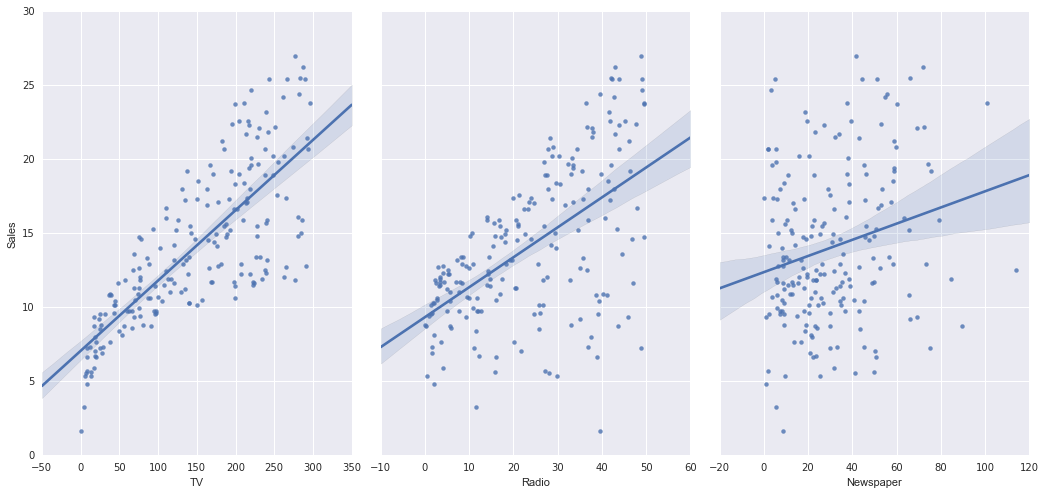

In [48]:
# Visualizing Seaborn
import seaborn as sns
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [49]:
## Linear Regression
feature_cols = ['TV','Radio','Newspaper']
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]
y = data['Sales']

In [50]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients¶


In [53]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [54]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150246),
 ('Radio', 0.17915812245088861),
 ('Newspaper', 0.0034504647111804759)]

How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

- Important notes:
> This is a statement of association, not causation.
> If an increase in TV ad spending was associated with a decrease in sales, β1 would be negative.

In [55]:
#Making predictions
y_pred = linreg.predict(X_test)

In [57]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# Model evaluation metrics for regression¶

In [58]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print (10 + 0 + 20 + 10)/4.

# calculate MSE using scikit-learn
print metrics.mean_absolute_error(true, pred)

10.0
10.0


In [60]:
# calculate MSE by hand
print (10**2 + 0**2 + 20**2 + 10**2)/4.

# calculate MSE using scikit-learn
print metrics.mean_squared_error(true, pred)

150.0
150.0


In [59]:
# calculate RMSE by hand

import numpy as np
print np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate RMSE using scikit-learn
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139



### Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Computing the RMSE for our Sales predictions

In [61]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))


1.40465142303


# Feature selection

- Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [62]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994



The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

# Cross-validation example: feature selection

Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [63]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

In [64]:
# 10-fold cross-validation with all three features
scores = cross_val_score(linreg, X, y, cv=10, scoring='mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [65]:
# fix the sign of MSE scores
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [66]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [67]:
# calculate the average RMSE
print rmse_scores.mean()

1.69135317081


In [69]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='mean_squared_error')).mean()

1.67967484191


## Improvements to cross-validation
1. Repeated cross-validation
> - Repeat cross-validation multiple times (with different random splits of the data) and average the results
> - More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation
2. Creating a hold-out set
> - "Hold out" a portion of the data before beginning the model building process
> - Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
> - More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample
3. Feature engineering and selection within cross-validation iterations
> - Normally, feature engineering and selection occurs before cross-validation
> - Instead, perform all feature engineering and selection within each cross-validation iteration
> - More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

# Efficiently searching for optimal tuning parameters

Already seen parameter tuning for iris data using cross-val

# More efficient parameter tuning using GridSearchCV¶

Allows you to define a grid of parameters that will be searched using K-fold cross-validation


In [79]:
# create X (features) and y (response)
X = iris.data
y = iris.target

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)

In [81]:
from sklearn.grid_search import GridSearchCV

In [82]:
# define the parameter values that should be searched
k_range = range(1, 31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [83]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [85]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

In [86]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [88]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [89]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [90]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


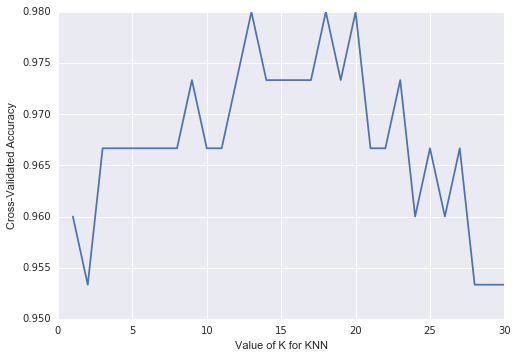

In [91]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [92]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# Searching multiple parameters simultaneously

- Tuning K values 1 to 30 and also weight function ['uniform', 'distance']


In [94]:
# define the parameter values that should be searched
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [95]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [96]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [97]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [98]:
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


# Using the best parameters to make predictions

In [99]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([3, 5, 4, 2])

C:\Users\seeth_000\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [100]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([3, 5, 4, 2])

C:\Users\seeth_000\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

# Reducing computational expense using RandomizedSearchCV

- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [102]:
from sklearn.grid_search import RandomizedSearchCV

In [103]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- Important: Specify a continuous distribution (rather than a list of values) for any continous parameters

In [104]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [106]:
# examine the best model
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 20, 'weights': 'uniform'}


In [107]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98]
